In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import os.path as op

In [3]:
from AFQ import api

/home/jyeatman/anaconda2/lib/python2.7/site-packages/skimage/filter/__init__.py:6: skimage_deprecation: The `skimage.filter` module has been renamed to `skimage.filters`.  This placeholder module will be removed in v0.13.
  warn(skimage_deprecation('The `skimage.filter` module has been renamed '


In [4]:
import AFQ.data as afd
import AFQ.viz as afv

In [5]:
afd.organize_stanford_data()

Dataset is already in place. If you want to fetch it again please first remove the folder /home/jyeatman/.dipy/stanford_hardi 


In [6]:
base_dir = op.join(op.expanduser('~'), 'AFQ_data', 'stanford_hardi')

In [7]:
op.join(afd.afq_home, 'stanford_hard')

'/home/jyeatman/AFQ_data/stanford_hard'

In [8]:
myafq = api.AFQ(preproc_path=op.join(afd.afq_home, 'stanford_hardi'), sub_prefix='sub',
               wm_labels=[1, 2])

In [9]:
myafq.data_frame

,anat_file,bval_file,bvec_file,dwi_file,seg_file,sess,subject,gtab,dwi_affine
0,/home/jyeatman/AFQ_data/stanford_hardi/sub-01/...,/home/jyeatman/AFQ_data/stanford_hardi/sub-01/...,/home/jyeatman/AFQ_data/stanford_hardi/sub-01/...,/home/jyeatman/AFQ_data/stanford_hardi/sub-01/...,/home/jyeatman/AFQ_data/stanford_hardi/sub-01/...,/home/jyeatman/AFQ_data/stanford_hardi/sub-01/...,sub-01,<dipy.core.gradients.GradientTable object at 0...,"[[2.0, 0.0, 0.0, -80.0], [0.0, 2.0, 0.0, -120...."


In [10]:
myafq.brain_mask

0    /home/jyeatman/AFQ_data/stanford_hardi/sub-01/...
Name: brain_mask_file, dtype: object

In [11]:
import nibabel as nib

In [12]:
dti_img = nib.load(myafq.dti[0])
dti_data = dti_img.get_data()

In [13]:
myafq['gtab']

0    <dipy.core.gradients.GradientTable object at 0...
Name: gtab, dtype: object

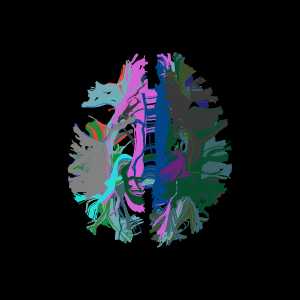

In [14]:
ren = afv.visualize_bundles(myafq.bundles[0])

In [16]:
import dipy.viz.fvtk as vtk

In [17]:
vtk.show(ren)

In [18]:
import pandas as pd

In [19]:
df = pd.read_csv(myafq.tract_profiles[0])

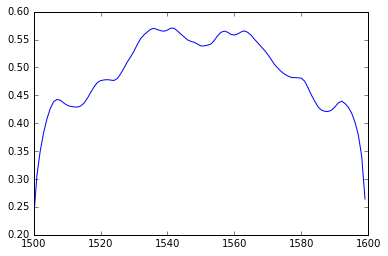

In [20]:
plt.plot(df[(df['scalar'] == "dti_fa") & (df['bundle']=="UNC_R")]['profiles'])

In [28]:
# This should become a function to load tract easily
trk = nib.streamlines.load(myafq.bundles[0])
idx = np.where(trk.tractogram.data_per_streamline['bundle'] == 18)[0]
fg = list(trk.streamlines[idx])

In [29]:
# function for cleaning will be something like this
import AFQ.segmentation as seg
iter = 100 # Number of cleaning iterations
M_thresh = 4 # This should correspond to a zscore of 4
for ii = range(iter):
    M, W = seg.gaussian_weights(fg, n_points=100)
    # Find outlier fibers
    keep = np.max(M,1) < M_thresh
    fg[keep]

(1741,)